# Tweet Sentiment Predictive Modeling

1. Show data cleaning and preparation steps

2. Perform EDA on the given dataset and list out findings

3. Predict Sentiment using various models and technicals

4. Model validation and summary

In [31]:
# Importing neccessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy import stats
%matplotlib inline

# Libraries
from __future__ import print_function
import seaborn as sns #visualization

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))
from plotly.offline import *

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Get mode values from mode function
def Mode(x, axis=0):
    return mode(x, axis).mode

## 1. Data Cleaning and preparation steps

In [0]:
# Load dataset
dataset = pd.read_excel(open('uglywords_2Creat_v2.xlsx', 'rb'),
              sheet_name='uglywords1')

In [34]:
# Quick view of data
dataset.head(1)

,Label,Tweet
0,0.0,*screams in 25 different languages*


In [5]:
dataset.nunique()

Label       2
Tweet    1855
dtype: int64

In [6]:
# Percentage per category for the target column.
percentage_labels = dataset['Label'].value_counts(normalize = True) * 100
percentage_labels

0.0    80.053548
1.0    19.946452
Name: Label, dtype: float64

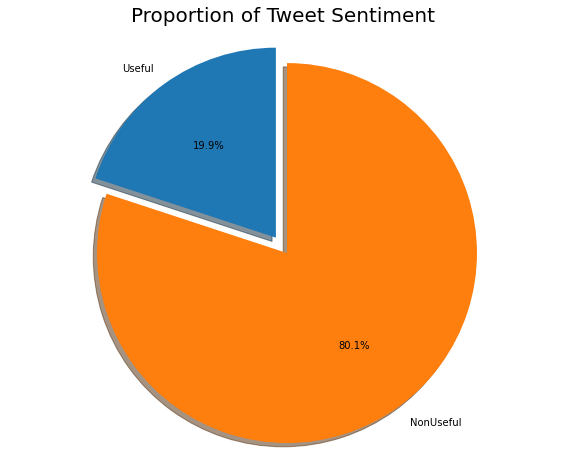

In [35]:

labels = 'Useful', 'NonUseful'
sizes = [dataset.Label[dataset['Label']==1].count(), dataset.Label[dataset['Label']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Tweet Sentiment ", size = 20)
plt.show()

In [36]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# init lemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(1, 695):  # 738

    review = re.sub(r'http\S+', '',  dataset['Tweet'][i])
    review = re.sub(r'@[A-Za-z0-9]+','',review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()

    # init lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words=[lemmatizer.lemmatize(word=word,pos='n') for word in review]
    
    #review = ' '.join( [w for w in lemmatized_words if len(w)>1] )
    # init porter stemmer
    ps = PorterStemmer()
    review = [ps.stem(word) for word in lemmatized_words if not word in set(stopwords.words('english'))]

    
    #review = ' '.join(review)
    review = ' '.join( [w for w in lemmatized_words if len(w)>1] )
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


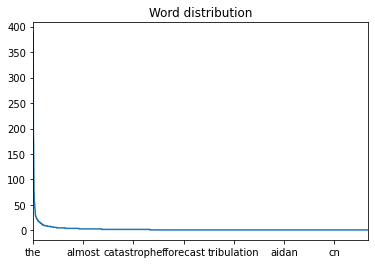

In [38]:
#Find words spreading (each word frequency)
freq_d = pd.Series(' '.join(corpus).split()).value_counts()
#Plot the words distribution
freq_d.plot(kind='line', ax=None, figsize=None, use_index=True,
            title="Word distribution", grid=None, legend=False, style=None,
            logx=False, logy=False, loglog=False, xticks=None,
            yticks=None, xlim=None, ylim=None, rot=None,
            fontsize=None, colormap=None, table=False, yerr=None,
            xerr=None, label=None, secondary_y=False)

## 2. Feature Engineering and EDA analysis
1. Bag of words
2. Term frequency and inverse term frequency


### 2.1. Bag of words


---



In [0]:

# Creating the Bag of Words model
# only 1-grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
#dataset['Label'].fillna(0)
y =  dataset.iloc[1:695, 0].values   #738


In [0]:
# additonal model for 1-grams, and 2-grams
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
cv.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
cv.set_params(stop_words='english')

# include 1-grams and 2-grams
cv.set_params(ngram_range=(1, 2))



X = cv.fit_transform(corpus).toarray()  

# need to remove low freq n-grams


### 2.2. Term frequency and inverse term frequency 

In [0]:
# additonal model for TF-ITF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features = tfidf.fit_transform(corpus)


In [0]:
df_tfidf = pd.DataFrame(features.todense(), columns= tfidf.get_feature_names())

In [17]:
selected_features = []
for i in range(len(df_tfidf.columns)):
  i
  if (sum(df_tfidf.iloc[:, i] > 0)) > 2:
    selected_features.append(i)
         
len(selected_features)

824

In [0]:
df_tfidf= df_tfidf.iloc[:, selected_features]

In [19]:

df_tfidf.describe()

,abc,about,about the,accident,across,act,action,affected,after,after the,against,age,ago,air,airport,airport get,all,all the,almost,already,also,always,am,america,american,amp,an,and,and it,and that,and the,and you,animal,annihilated,anniversary,anniversary of,another,anthrax,anthrax lab,any,...,white,who,whole,why,wild,wild fire,wildfire,will,will be,win,wind,windstorm,with,with the,without,woman,won,word,work,world,would,would be,would have,wound,wow,wreck,wrecked,writer,wrought,year,year after,yet,yo,you,you are,you can,you re,your,yours,yr
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,...,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.00000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.001087,0.007783,0.002641,0.001579,0.002176,0.002840,0.001428,0.001531,0.007478,0.001197,0.001969,0.000982,0.001244,0.001893,0.001731,0.001731,0.008163,0.001709,0.001615,0.001421,0.001160,0.002918,0.002662,0.001312,0.002630,0.006125,0.009497,0.033373,0.001442,0.000983,0.003490,0.001504,0.001748,0.001528,0.001020,0.001020,0.001847,0.000864,0.000864,0.003461,...,0.001430,0.006346,0.002149,0.004568,0.002319,0.001776,0.002970,0.006586,0.001709,0.002293,0.003631,0.002603,0.013929,0.002363,0.002817,0.002026,0.001756,0.001826,0.002981,0.005684,0.004817,0.001518,0.001277,0.002276,0.001959,0.004279,0.001884,0.001632,0.000966,0.003817,0.00107,0.002392,0.002057,0.018101,0.001267,0.001214,0.001784,0.005900,0.001428,0.001317
std,0.016541,0.042854,0.028729,0.020988,0.028993,0.031575,0.021804,0.021600,0.042488,0.018250,0.027748,0.015475,0.019063,0.028920,0.020334,0.020334,0.042751,0.020430,0.025365,0.021732,0.017759,0.027281,0.026996,0.020299,0.025309,0.041560,0.052709,0.072576,0.022203,0.015362,0.035025,0.019953,0.026821,0.023358,0.015941,0.015941,0.021789,0.013152,0.013152,0.029777,...,0.021996,0.040274,0.026742,0.039812,0.025369,0.023677,0.028290,0.039246,0.022906,0.031254,0.028996,0.031187,0.050221,0.025677,0.030940,0.027396,0.023707,0.024491,0.028723,0.036557,0.036791,0.020195,0.019960,0.031299,0.027870,0.047743,0.031525,0.021882,0.014903,0.031218,0.01697,0.029216,0.032680,0.066153,0.017091,0.018586,0.025147,0.038349,0.023380,0.017725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# 3. Model Selection
First, we want to use base model such as Guassian Naive Bayes and logisitic regression. After that I decided to use a ANN with a pre trained model with embedding layer. Finally, after select the final ANN model with embedding layer, I try the K force cross validation.   

## 3.1 Model library to use

In [0]:
class Standardization():
    
    def __init__(self, X):
        self.std = np.std(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.std + eposilon)
        return X_

class MeanNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.max - self.min + eposilon)
        return X_

class MaxMinNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.min)/(self.max - self.min + eposilon)
        return X_

In [0]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [0]:
class GenLogisticRegression():

  #def _init_(self, thresh=0.5):
  #  self.W = None
  #  self.B = None

  def _init_(self, thresh=0.5):
    # self.W = np.random.randn(D,K)
    # self.B = np.random.randn(K)
    self.W = None
    self.B = None

  def fit(self, X, y, eta = 2e-2, epochs = 1e3, show_curve = False):
    N,D = X.shape
    epochs = int(epochs)
    K = len(np.unique(y))

    #y_values = np.unique(y, return_index = False)
    Y = indices_to_one_hot(y,K).astype(int)

    try:
      self.W
    except AttributeError:
      self.W = np.random.randn(D,K)
      self.B = np.random.randn(K)

    J = np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self._forward_(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("J")
      plt.title("Training Curve")
      plt.show()

  def _forward_(self, X):
      return softmax(X@self.W + self.B)

  def predict(self,X):
      return np.argmax(self._forward_(X),axis=1)

In [0]:
def sigmoid(h, epsilon = 1e-5):
    return 1/(1 + np.exp(-h + epsilon))

def cross_entropy(y, p_hat, epsilon = 1e-3):
    return -(1/len(y)) * np.sum(y * np.log(p_hat + epsilon)\
                                + (1- y) * np.log(1 - p_hat + epsilon))

#def cross_entropy(Y, P_hat):
#    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis = 1), axis = 0)


def weighted_cross_entropy(y, p_hat, eta = 1, epsilon = 1e-3):
    pos_w = (1/len(y[y == 1]))*eta
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg
                               
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

def cost(X, y, model, thresh):
    # cost weights
    fp = 10
    fn = 500
    # predict
    y_hat_n = model.predict(X[y == 0], thresh = thresh)
    y_hat_p = model.predict(X[y == 1], thresh = thresh)
    # get cost
    cost1 = fp*np.sum(y_hat_n == 1)
    cost2 = fn*np.sum(y_hat_p == 0)
    return cost1 + cost2

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y    

def indices_to_one_hot(data, nb_class):
    
    #coverts on iterable of indices to one hot labels
    targets = np.array(data).reshape(-1)
    return np.eye(nb_class)[targets]

def softmax(h):
    
    return (np.exp(h.T)/np.sum(np.exp(h), axis =1)).T

In [0]:
def linear(H):
    return H

def ReLu(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def stable_softmax(H):
    eH = np.exp(H - np.max(H))
    return eH / eH.sum(axis = 1, keepdims = True)
    

def sigmoid(H):

  return 1/(1 + np.exp(-H))


# only works for 0 and 1
#def cross_entropy (Y, p_hat):
#    return -np.sum(Y*np.log(p_hat))
# work for general case
def cross_entropy(Y, p_hat):
  return -(1/len(Y))*np.sum(Y*np.log(p_hat))

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def accuracy (y, y_hat):
    return np.mean(y == y_hat)

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)



def weighted_cross_entropy(y, p_hat, epsilon = 1e-3):
    pos_w = 1/len(y[y == 1])
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg


def R2(y, y_hat):
    return sqrt((y - y_hat)**2)

def derivative(Z, a):
  if a == "linear":
    return 1
  elif a == sigmoid :
    return Z*(1-Z)
  elif a==np.tanh :
    return 1 - Z*Z
  elif a == ReLu:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown activation")

In [0]:
class ANN():

  def __init__(self, architecture, activations = None, mode = 0):
    self.mode = mode
    self.architecture = architecture
    self.L = len( architecture) +1
    self.activations = activations

  def fit(self, X, y, eta= 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)

    if self.mode:
      Y = y
    else: 
      Y = one_hot_encode(y)
    
    N, D = X.shape
    K = Y.shape[1]

    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D]+self.architecture),(self.architecture + [K])), 1)}
        
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

    if self.activations is None:
      self.a = {l: ReLu for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}

    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L]) 
      else:
        J[epoch] = weighted_cross_entropy(Y, self.Z[self.L]) 
                    #cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L] - Y)

      for l in sorted(self.W.keys(), reverse= True):
        dW = self.Z[l-1].T @ dH
        db = dH.sum(axis = 0)
        
        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@(self.W[l]).T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])
       
       # print out J errors every 100 iterations
      if epoch % 100 == 0:
          print ( epoch, J[epoch])

          #print ("Epoch:{}".format(epoch))
          #print ("Train Error: {:.4f}".format(dH) )
          #print('Epoch:{}, train error: {:.4f} '.format(epoch , dH))
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("Loss function")
      plt.show


  def forward(self, X):
    
    self.Z ={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l] )
  
  def predict(self, X):

    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)

In [0]:
'''Basic Logistic Regression'''

class LogisticRegression():
    
    def __init__(self, size):
        self.w = np.random.randn(size)
        self.b = np.random.randn(1)
    
    def fit(self, X_trn, y_trn,
            X_val, y_val,
            lr = 1e-1, epochs = 1e3,
            show_curve = False):
        
        epochs = int(epochs)
        N, D = X_trn.shape
        
        J_trn = np.zeros(epochs) # train loss
        J_val = np.zeros(epochs) # validation loss
        
        for epoch in range(epochs): # start to train
            # get probability
            p_hat = self.__forward(X_trn)
            # record training process
            J_trn[epoch] = cross_entropy(y_trn, p_hat)
            J_val[epoch] = cross_entropy(y_val, self.__forward(X_val))
            # weights update    
            self.w -= lr*(1/N)*X_trn.T@(p_hat - y_trn)
            self.b -= lr*(1/N)*np.sum(p_hat - y_trn)
            # print progress
            if epoch % 250 == 0:
                print('Epoch: {}, train error: {:.4f}, valid error: {:.4f}'.\
                      format(epoch, J_trn[epoch], J_val[epoch]))
        # plot curve
        if show_curve:
            plt.figure(figsize = (15, 6))
            # train plot
            plt.subplot(121); plt.plot(J_trn)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve', fontsize = 15)
            # valid plot
            plt.subplot(122); plt.plot(J_val)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Validation Curve', fontsize = 15)
        # return training process
        return {'J_trn': J_trn, 'J_val': J_val}
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)
        
    def predict(self, X, thresh = 0.5):
        return (self.__forward(X) >= thresh).astype(np.int32)




In [0]:
class WeightedLogisticRegression(LogisticRegression):
    '''Weighted Logistic Regression'''
    # Assume positive: minority dataset
    #        negative: majority dataset
    # Weight more on positive dataset
    # eta: control positive cases learning weights
    #      1 is the default, < 1 reduce the weights, > 1 increase the weights
    
    def fit(self, X_trn, y_trn,
            X_val, y_val,
            eta = 1,                 # weight for positive dataset
            lr = 1e-1, epochs = 1e3,
            show_curve = False):
        
        epochs = int(epochs)
        N, D = X_trn.shape
        
        J_trn = np.zeros(epochs) # train loss
        J_val = np.zeros(epochs) # validation loss

        for epoch in range(epochs): # start to train
            # get probability for cross entropy
            p_hat = self.__forward(X_trn)
            # record training process
            J_trn[epoch] = weighted_cross_entropy(y_trn, p_hat, eta = eta)
            J_val[epoch] = weighted_cross_entropy(y_val, self.__forward(X_val), eta = eta)
            # weights update
            self.w -= lr*(eta*(1/len(y_trn[y_trn == 1]))*X_trn[y_trn == 1].T@(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*X_trn[y_trn == 0].T@(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            
            self.b -= lr*(eta*(1/len(y_trn[y_trn == 1]))*np.sum(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*np.sum(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            # print progress
            if epoch % 250 == 0:
                print('Epoch: {}, train error: {:.4f}, validation error: {:.4f}'.\
                      format(epoch, J_trn[epoch], J_val[epoch]))
        # plot curve
        if show_curve:
            plt.figure(figsize = (15, 6))
            # train plot
            plt.subplot(121); plt.plot(J_trn)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve', fontsize = 15)
            # valid plot
            plt.subplot(122); plt.plot(J_val)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Validation Curve', fontsize = 15)
        # return training process
        return {'J_trn': J_trn, 'J_val': J_val}
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)

           

In [0]:

''' Assistant Functions '''

def weighted_cross_entropy(y, p_hat, eta = 1, epsilon = 1e-3):
    pos_w = (1/len(y[y == 1]))*eta
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg    

    

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Normalized
y = y.astype(np.int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### 3.1. Gussian Naive Bayes and Logistic Regression w Smote

In [111]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

#smt = SMOTE()
#X_train_, y_train_ = smt.fit_resample(X_train, y_train)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#classifier.fit(X_train_, y_train_)


GaussianNB(priors=None, var_smoothing=1e-09)

In [112]:
from sklearn.metrics import confusion_matrix
y_hat = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_hat)
print(cm)
print (accuracy(y_test, y_hat))


[[105  10]
 [ 17   7]]
0.8057553956834532


In [0]:
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words = None, sample = 0):
  if words == None:
    words.np.random.choice(list(model.vocab.keys()), sample)
  else:
    wrods = {word for word in model.vocab}
  
  word_vector = np.array([model[w] for w in words])
  twodim = PCA().fit_transfrom(word_vectors)[:,:2]

  plt.figure(figsize=(6,6))
  plt.scatter(twodim[:,0], twodim[:,1], edgecolora='k', c='r')

  for word, (x, y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word) 


In [30]:
display_pca_scatterplot(cv)

NameError: ignored

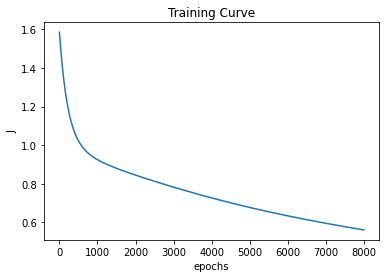

0.762589928057554

In [126]:
# Fit the model
# Initialize a generalized Logistic regression Model
reg = GenLogisticRegression()

reg.fit(X_train, y_train, eta = 0.01, epochs = 8000, show_curve=True)
y_hat = reg.predict(X_test)
accuracy(y_test, y_hat) 


In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
cm

array([[95, 20],
       [13, 11]])

In [59]:
# Logistic regression from generalized logistic with SMOTE

from imblearn.over_sampling import SMOTE

reg = GenLogisticRegression()

reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

weights = reg.W
intercept = reg.B

for i in range(5):
  reg_ = GenLogisticRegression()
  reg_.W = weights
  reg_.B = intercept
  smt = SMOTE()
  X_train_, y_train_ = smt.fit_resample(X_train, y_train)
  
  reg_.fit(X_train_, y_train_, eta = 0.001, epochs = 10)


  weights = reg_.W
  intercept = reg_.B

y_hat = reg_.predict(X_train)
y_hat_test = reg_.predict(X_test)
print ("train accuray:", np.mean(y_train == y_hat))
print ("test accuracy :",  np.mean(y_test == y_hat_test))

train accuray: 0.6990990990990991
test accuracy : 0.7122302158273381


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat_test)
print(cm)

### 3.2. ANN with Smote, class weights and pre trained model

0 2.1620875675977236
100 1.1277990311389547
200 1.038352387579569
300 1.0043458598473385
400 0.9866751459166551
500 0.9755918929825106
600 0.9677618712358435
700 0.9617869719978096
800 0.9569293915131525
900 0.9527615305738744
1000 0.9490242989554281
1100 0.9455534679997291
1200 0.9422391654308022
1300 0.9390038032683067
1400 0.9357916045973504
1500 0.9325654727903004
1600 0.9293069219258406
1700 0.9260133004040139
1800 0.9226883648159174
1900 0.9193303916743432
Test Accuracy:  0.8129


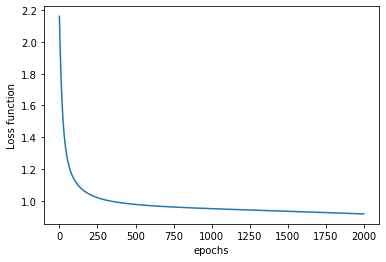

In [129]:
from imblearn.under_sampling import NearMiss
#nr = NearMiss()
#X_train_, y_train_ = nr.fit_sample(X_train, y_train)

ann = ANN([6,6,6 ], [np.tanh, np.tanh, np.tanh ] )
ann.fit(X_train, y_train, eta = 0.02, epochs = 2000, show_curve = True)
    
y_hat = ann.predict(X_test)
    
print(f"Test Accuracy: {accuracy(y_test, y_hat): 0.4f}")

In [0]:
# ANN with keep learning from previous runs with nearMiss or SMOTE every time (adding noise)

from imblearn.over_sampling import SMOTE

#reg = GenLogisticRegression()

#reg.fit(X_train, y_train)
#y_hat = reg.predict(test_X)
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_, y_train_ = nr.fit_sample(X_train, y_train)
ann = ANN([30,30,30, 30], [np.tanh, np.tanh, np.tanh, np.tanh] )
ann.fit(X_train, y_train, eta = 0.01, epochs = 500, show_curve = True)

weights = ann.W
w0 = ann.b

for i in range(50):
  ann_ = ANN([30 ,30,30, 30], [np.tanh, np.tanh, np.tanh, np.tanh])

  ann_.W = weights
  ann_.b = w0 
  #smt = SMOTE(random_state= i)
  nr = NearMiss(random_state=i)
  X_train_, y_train_ = nr.fit_sample(X_train, y_train)
  #X_train_, y_train_ = smt.fit_resample(X_train, y_train)
  
  ann_.fit(X_train_, y_train_, eta = 0.1, epochs = 1000)

  y_hat = ann_.predict(X_train)
  y_hat_test = ann_.predict(X_test)
  print ("train accuray:", np.mean(y_train == y_hat))
  print ("test accuracy :",  np.mean(y_test == y_hat_test))
  weights = ann_.W
  w0 = ann_.b

#y_hat = reg_.predict(X_train)
#y_hat_test = reg_.predict(X_test)
#print ("train accuray:", np.mean(y_train == y_hat))
#print ("test accuracy :",  np.mean(y_test == y_hat_test))

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

!pip install tensorflow-hub
!pip install tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.2.0-rc1
Eager mode:  True
Hub version:  0.7.0
GPU is NOT AVAILABLE


In [0]:
Cleaned_Df = pd.DataFrame(data = corpus, columns = ['CleanedTweet'])
label_df = pd.DataFrame(data = dataset.iloc[1:695, 0].values, columns = ["Indicator"])
cleaned2_Df = pd.concat([label_df, Cleaned_Df], axis = 1)

cleaned2_Df.to_csv("clean_Tweet.csv", index=False)


trained_dataset_url = "clean_Tweet.csv"
df_train = pd.read_csv(trained_dataset_url)

In [0]:
train_data = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_train.iloc[:550, 1].values, tf.string),
            tf.cast(df_train.iloc[:550, 0].values, tf.int32)
        )
    )
)

validation_data = (
    tf.data.Dataset.from_tensor_slices(
        (   
            tf.cast(df_train.iloc[550:695, 1].values, tf.string),
            tf.cast(df_train.iloc[550:695, 0].values, tf.int32)
        )
    )
)

In [0]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1" 
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [0]:
from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(hub_layer)

model.add(tf.keras.layers.LSTM(16, activation = 'tanh'))
#model.add(tf.keras.layers.LSTM(2, return_sequences=True, return_state=True))
#model.add(tf.keras.layers.Dense(64, activation ='tanh'))
model.add(tf.keras.layers.LSTM())
model.add(tf.keras.layers.Dense(32, activation ='tanh'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [134]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 48,192,777
Trainable params: 48,192,777
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss =tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [136]:
history = model.fit(train_data.shuffle(100).batch(24), epochs=5, validation_data=validation_data.batch(12), verbose=1)

Epoch 1/5
23/23 [==============================] - 13s 546ms/step - loss: 0.6414 - accuracy: 0.7982 - val_loss: 0.5251 - val_accuracy: 0.8403
Epoch 2/5
23/23 [==============================] - 12s 533ms/step - loss: 0.4722 - accuracy: 0.8018 - val_loss: 0.4523 - val_accuracy: 0.8403
Epoch 3/5
23/23 [==============================] - 12s 522ms/step - loss: 0.3846 - accuracy: 0.8055 - val_loss: 0.4312 - val_accuracy: 0.8403
Epoch 4/5
23/23 [==============================] - 12s 525ms/step - loss: 0.2874 - accuracy: 0.8473 - val_loss: 0.4281 - val_accuracy: 0.8472
Epoch 5/5
23/23 [==============================] - 12s 527ms/step - loss: 0.1851 - accuracy: 0.9036 - val_loss: 0.4386 - val_accuracy: 0.8403


In [138]:
results = model.evaluate(validation_data.batch(24), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

6/6 - 0s - loss: 0.4386 - accuracy: 0.8403
loss: 0.439
accuracy: 0.840


In [0]:
# Predicting the Test set results
y_pred = model.predict(df_train.iloc[550:695, 1].values)
y_pred = (y_pred > 0.5)

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_train.iloc[550:695,0].values, y_pred)
cm

array([[119,   2],
       [ 21,   2]])

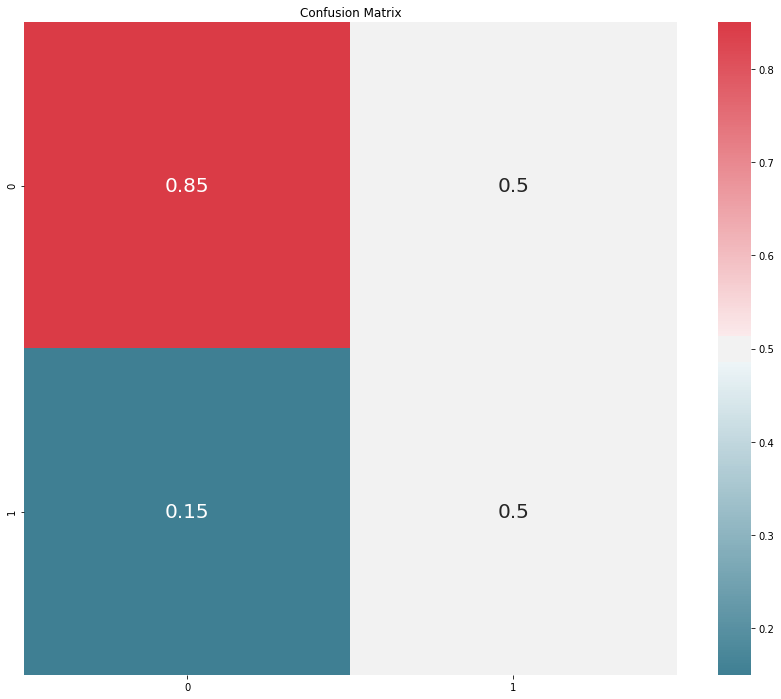

In [144]:
cm_ratio = cm/cm.sum(axis = 0)
f, ax = plt.subplots(figsize=(15, 12))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

sns.heatmap(cm_ratio, mask=np.zeros_like(cm_ratio, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax=ax, annot_kws={"size":20})
plt.show()

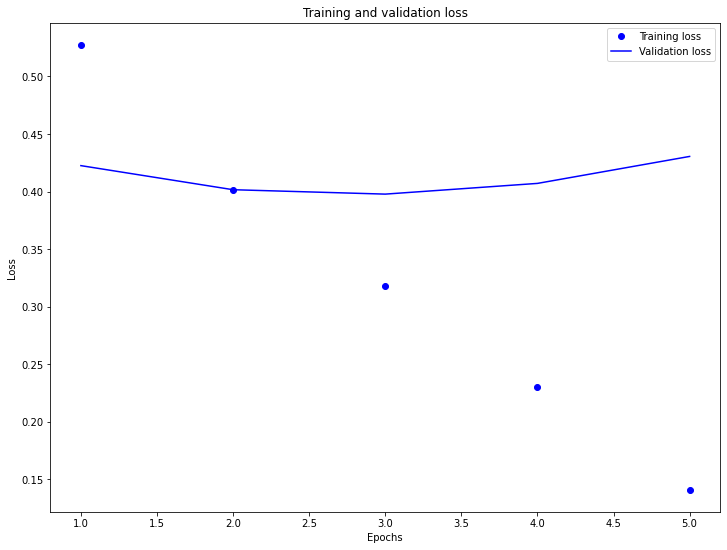

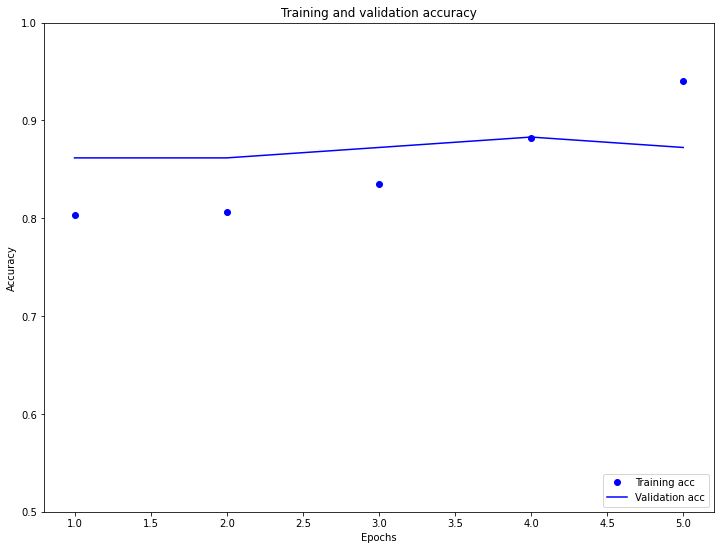

In [80]:
import matplotlib.pyplot as plt

history_dict = history.history


items = history.history.keys()


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

### 3.3 K fold cross validation and grid search

In [13]:
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

#from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
#from keras.layers import Dense
import time

Using TensorFlow backend.


In [0]:
#rt = StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
#kfold = KFold(10, True, 1)
#for train, test in kfold.split(trn_X, trn_y)
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

#accuracies.mean()

#accuracies.std()

kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

ifold = 0

temp_df = pd.DataFrame(list())
temp_df.to_csv('k_fold.csv.csv')
f = open('k_fold.csv', 'w')

dfObj = pd.DataFrame()

df_recall_prec = pd.DataFrame()
df_trn_X = df_train.iloc[:575, 1]
df_trn_y = df_train.iloc[:575, 0]

class_weight = {0: 1.,
                1: 1.3
                }

for train_index, test_index in kf.split(df_trn_X, df_trn_y):
    #X_tr_va, X_test =  X_train[train_index],  X_train[test_index]
    #y_tr_va, y_test = y_train[train_index], y_train[test_index]
    ifold = ifold +1

    train_data = (
      tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_train.iloc[train_index, 1].values, tf.string),
            tf.cast(df_train.iloc[train_index, 0].values, tf.int32)
        )
      )
    )

    validation_data = (
      tf.data.Dataset.from_tensor_slices(
        (   
            tf.cast(df_train.iloc[575:695, 1].values, tf.string),
            tf.cast(df_train.iloc[575:695, 0].values, tf.int32)
        )
      )
    )
    column_name = str(ifold)
    embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1" 
    hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
    
    model = tf.keras.Sequential()
    model.add(hub_layer)
    #model.add(tf.keras.layers.LSTM(16, activation = 'tanh'))
    #model.add(tf.keras.layers.LSTM(2, return_sequences=True, return_state=True))
    #model.add(tf.keras.layers.Dense(64, activation ='tanh'))
    model.add(tf.keras.layers.Dense(32, activation ='tanh'))
    #model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(16, activation = 'tanh'))
    #model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss =tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
    history = model.fit(train_data.shuffle(100).batch(24), epochs=5, validation_data=validation_data.batch(12), verbose=1)
    

    # Predicting the Test set results
    y_pred = model.predict(df_train.iloc[550:695, 1].values)
    y_pred = (y_pred > 0.5)
    
    cm = confusion_matrix(df_train.iloc[550:695,0].values, y_pred)
     
    #y_pred = classifier.predict(X_test)
    #y_pred = (y_pred > 0.5)

    #cm = confusion_matrix(y_test, y_pred)
    cm_ratio = cm/cm.sum(axis = 0)

     
    df_recall_prec[column_name] = cm_ratio.ravel()

    
 
df_recall_prec.to_csv("cm.csv")

In [0]:

df_recallPrec= df_recall_prec.T
df_= pd.DataFrame(data = df_recallPrec.to_numpy(), columns = ['Accuray', '1', '2', '3'])


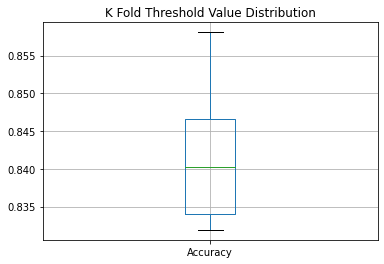

In [25]:
accuracys = [0.8319, 0.8487, 0.8487, 0.8581,0.8319, 0.8403, 0.8403, 0.8319, 0.8403, 0.8403]
df_ = pd.DataFrame(data = accuracys, columns = ['Accuracy'])
plt.title("K Fold Threshold Value Distribution")
df_.boxplot(column = [ 'Accuracy'])

## Our winner is artifical neural network with class weights: 85% accuracy and 50% of recall.